In [1]:
%load_ext autoreload
%autoreload 1
%aimport transformations

transformations loaded, version: 0.1


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import numpy as np
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_colwidth = 999
pd.options.display.max_rows = 113

import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import StandardScaler, PowerTransformer

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

RS = 35577 # global random state seed
data_path = './data-raw/'

%aimport transformations
%aimport f

framework loaded, version: 0.1


In [36]:
df_data = f.from_pkl(f'data-processed/data_clean.data.pkl')
df_data.shape
df_data.columns
df_data.head(3)

(9893842, 13)

Index(['experiment_id', 'bearing_1_id', 'bearing_2_id', 'timestamp', 'a1_x',
       'a1_y', 'a1_z', 'a2_x', 'a2_y', 'a2_z', 'rpm', 'w', 'status'],
      dtype='object')

,experiment_id,bearing_1_id,bearing_2_id,timestamp,a1_x,a1_y,a1_z,a2_x,a2_y,a2_z,rpm,w,status
4912,1,0,1,1.637333,-0.271517,0.244341,-0.302339,0.285992,0.194450,0.255007,36.644951,0.078311,0
4913,1,0,1,1.637667,-0.079124,0.149706,-0.206307,0.002779,0.194450,0.354653,36.644951,0.028275,0
4914,1,0,1,1.638000,-0.175320,-0.228832,-0.110275,0.285992,0.290562,-0.243222,36.644951,0.013856,0


In [ ]:
df_status_0 = df_data.loc[df_data['status'] == 0, 'experiment_id'].unique().tolist()[:3]
df_status_0
df_status_1 = df_data.loc[df_data['status'] == 1, 'experiment_id'].unique().tolist()[:3]
df_status_1

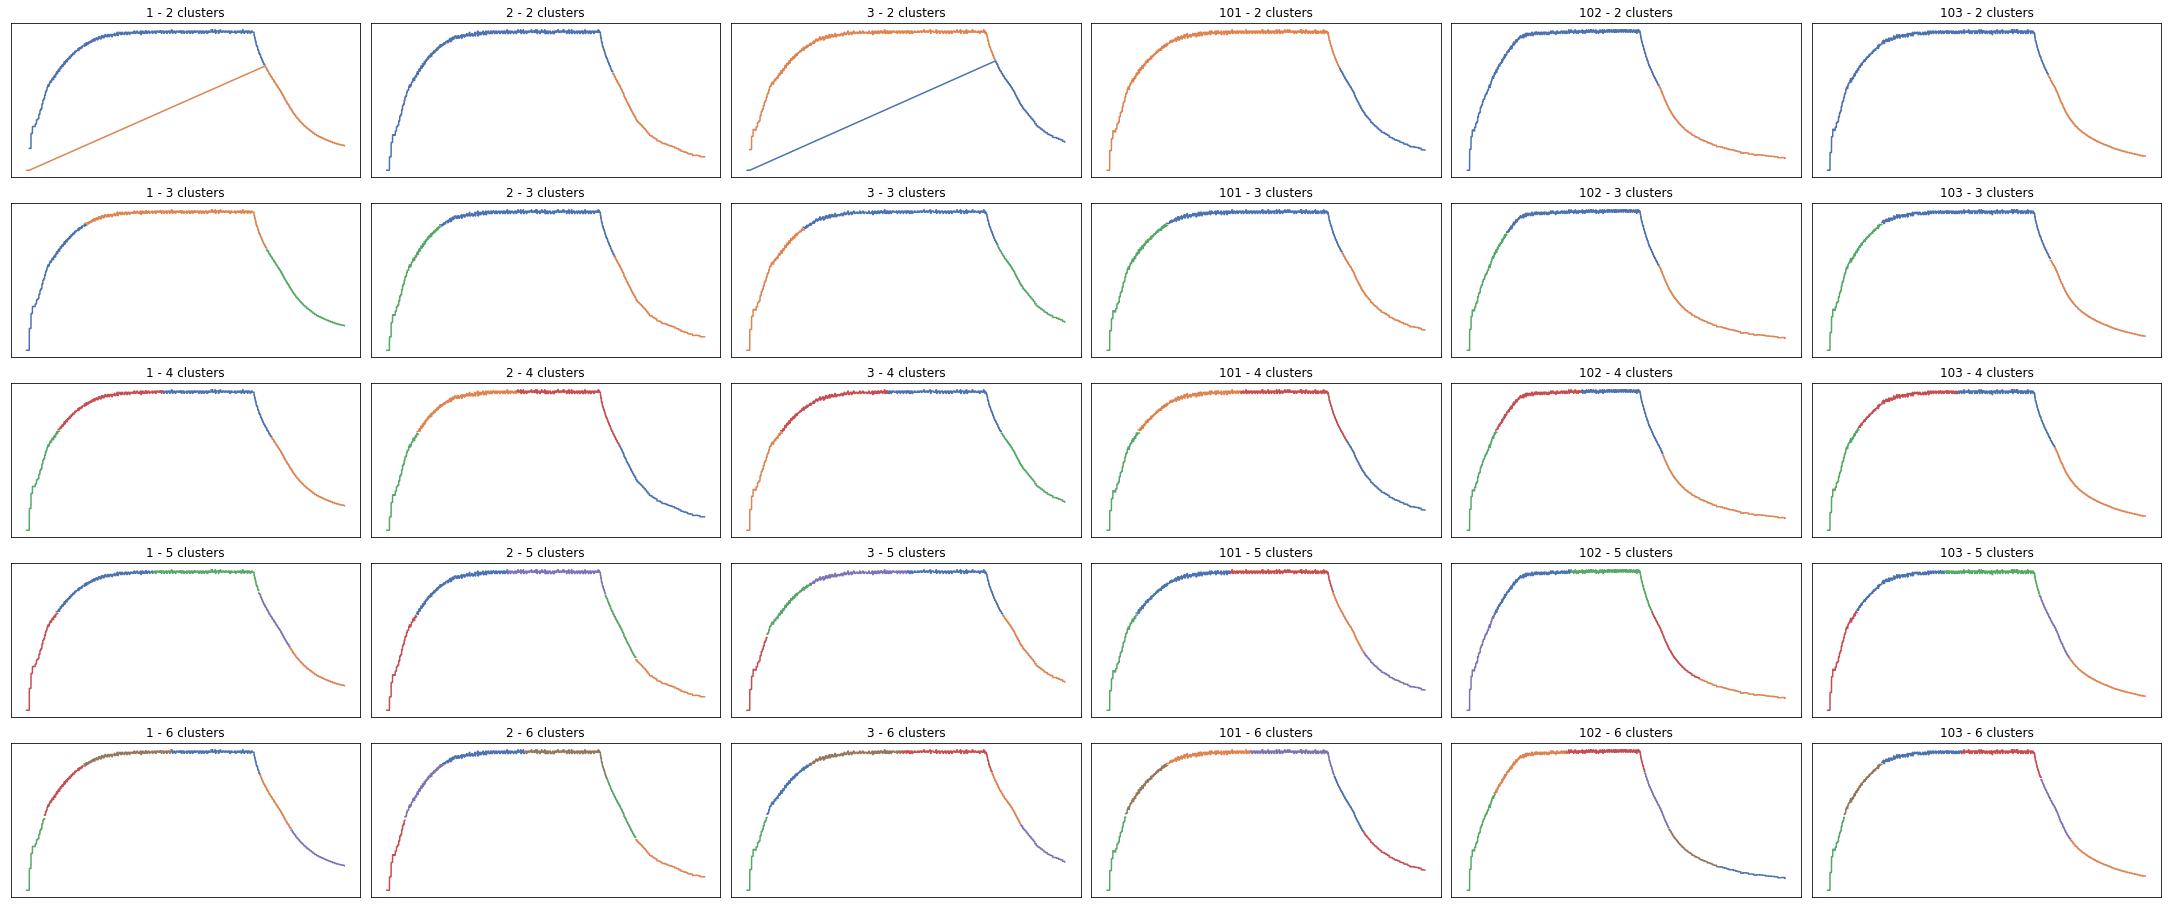

In [72]:
exp_ids = df_status_0 + df_status_1
n_clusters = list(range(2, 7))

axs = f.get_axes(len(n_clusters), len(exp_ids),2 , 2)
    
for i_exp, exp_id in enumerate(exp_ids):

    df_cluster = df_data.loc[df_data['experiment_id'] == exp_id, ['timestamp','rpm']].copy()
    df_cluster[['timestamp','rpm']] = StandardScaler().fit_transform(df_cluster[['timestamp','rpm']])

    inertias = []
    cluster_n = []

    for n, ax  in zip( n_clusters, axs[:, i_exp]):
        model = KMeans(n_clusters=n, random_state=RS)
        clusters = model.fit_predict(df_cluster[['timestamp','rpm']])

        cluster_n.append(n)
        inertias.append(model.inertia_)
        _ = sns.lineplot(data=df_cluster, x='timestamp', y='rpm', hue=clusters, ax = ax, palette="deep", legend = False).set_title(f'exp {exp_id} - {n} clusters')
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
    # _ = f.get_ax(0.5, 2).plot(cluster_n, inertias)

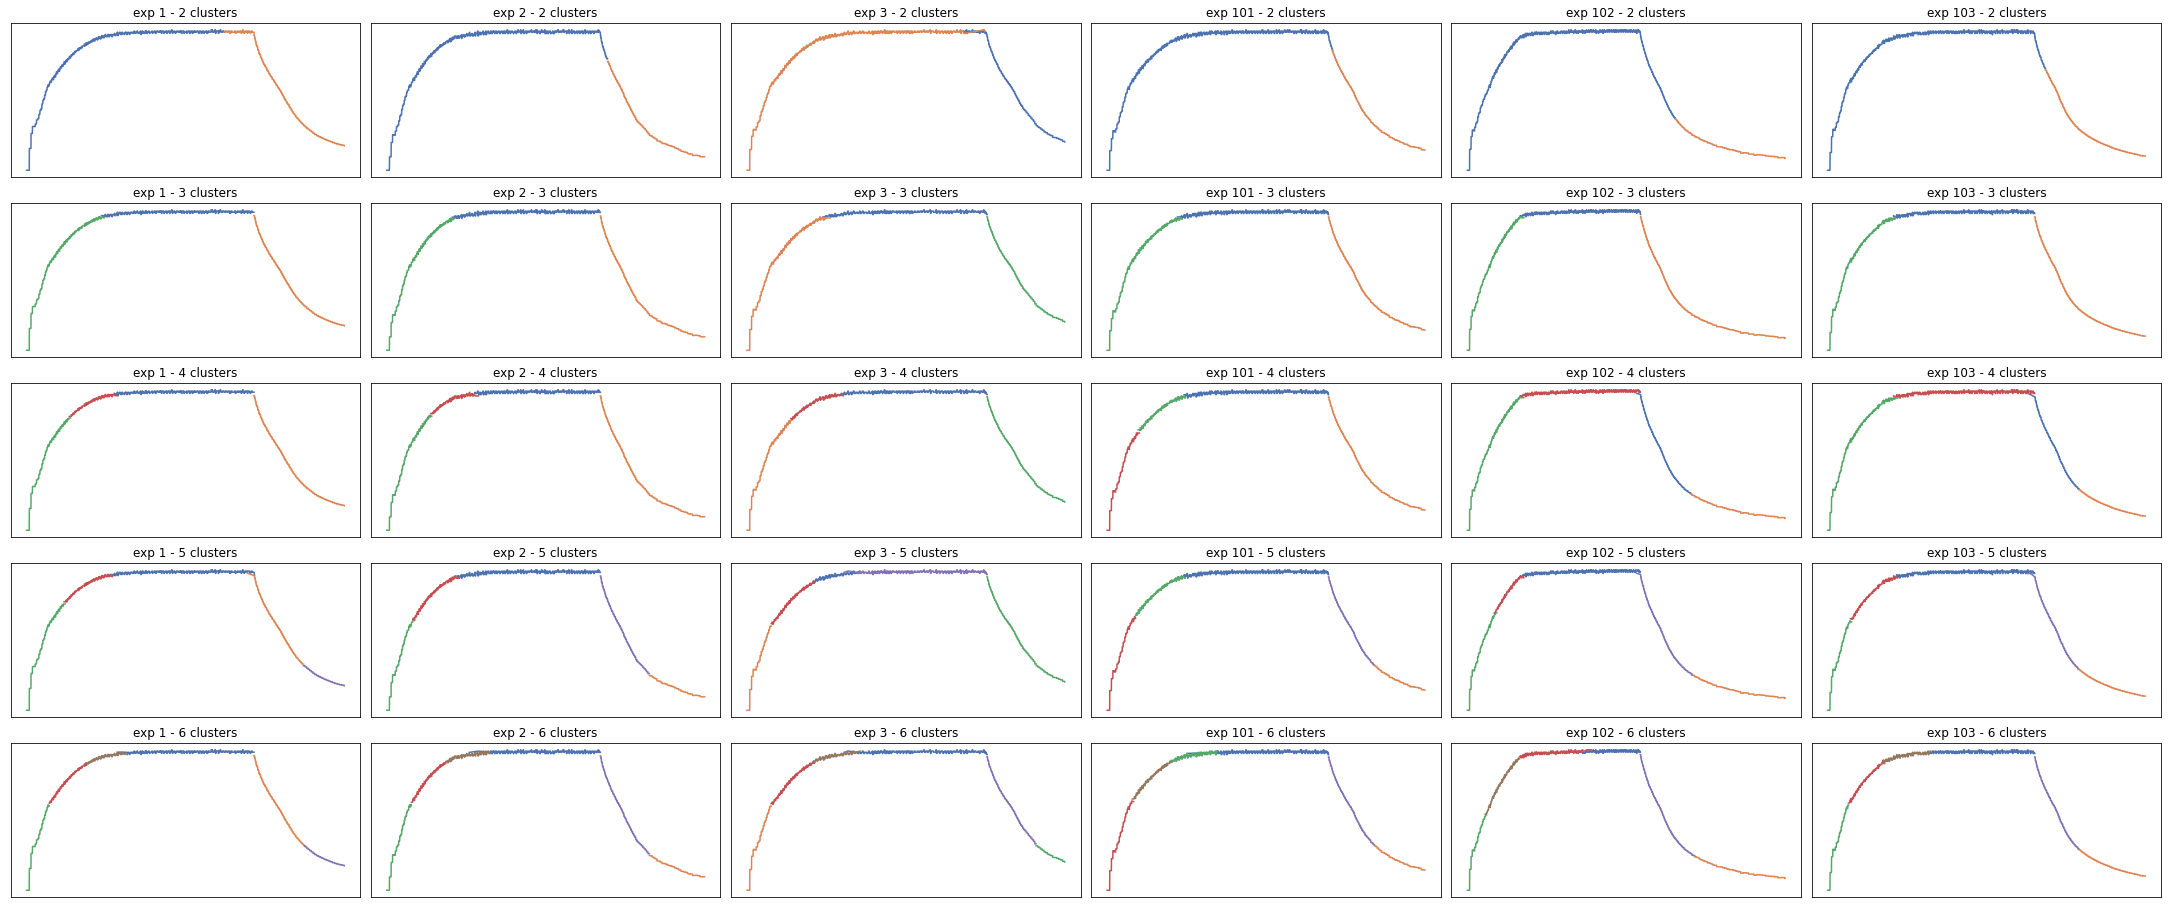

In [74]:
exp_ids = df_status_0 + df_status_1
n_clusters = list(range(2, 7))

axs = f.get_axes(len(n_clusters), len(exp_ids),2 , 2)
    
for i_exp, exp_id in enumerate(exp_ids):

    df_cluster = df_data.loc[df_data['experiment_id'] == exp_id, ['timestamp','rpm']].copy()
    df_cluster[['timestamp','rpm']] = StandardScaler().fit_transform(df_cluster[['timestamp','rpm']])

    inertias = [] # BIC / AUC
    cluster_n = []

    for n, ax  in zip( n_clusters, axs[:, i_exp]):
        model = GaussianMixture(n_components=n, random_state=RS)
        clusters = model.fit_predict(df_cluster[['timestamp','rpm']])

        cluster_n.append(n)
        # inertias.append(model.inertia_)
        _ = sns.lineplot(data=df_cluster, x='timestamp', y='rpm', hue=clusters, ax = ax, palette="deep", legend = False).set_title(f'exp {exp_id} - {n} clusters')
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
    # _ = f.get_ax(0.5, 2).plot(cluster_n, inertias)

In [ ]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html